In [16]:
import os
import pandas as pd
from process_data import load_processed_affinity_data, plot_affinity_by_edit_distance

In [17]:
root_dir = os.path.abspath("")
save_data_dir = os.path.join(root_dir, "processed_data")

In [18]:
ab = "6261"  # 6261 | 9114
save_df = True

In [19]:
df = load_processed_affinity_data(ab)
df

,binary_id,str_aa_id,edit_distance,H_seq,h1_mean,h9_mean,h1_class,h9_class
0,01010100111,TRAKQDSTGVV,5,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,9.444671,9.646672,1,1
1,01011110011,TRAKPDFTSVV,4,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,9.429218,9.404227,1,1
2,01010100101,TRAKQDSTGAV,6,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,9.099022,9.255789,1,1
3,01000100110,TRANQDSTGVL,7,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,9.322949,9.640237,1,1
4,01001100010,TRANPDSTSVL,7,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,8.612018,9.222265,1,1
...,...,...,...,...,...,...,...,...
1912,01100001000,TRTNQKSASAL,8,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,NaN,7.000000,0,0
1913,01101010000,TRTNPKFTSAL,7,QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSYAISWVRQAPGQGLE...,NaN,7.000000,0,0
1914,00101110101,TSTNPDFTGAV,5,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,NaN,7.000000,0,0
1915,00111010000,TSTKPKFTSAL,7,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,NaN,7.000000,0,0


In [20]:
if save_df:
    df.to_csv(os.path.join(save_data_dir, f"{ab}_affinities.csv"), index=False)

In [21]:
# check the proportion binding against paper values

ag = "h1"  # h1, h3, h9, fluB
lower_limit = df[f"{ag}_mean"].min()
print(f"lower limit for -log(Kd): \t{lower_limit}")

print(f"Total df size for {ab} and {ag}: \t\t\t\t\t\t{df.shape[0]:,}")

lower_limit_df = df[df[f"{ag}_mean"]==lower_limit]
print(f"Number of affinities for {ab} and {ag} equal to lower limit: \t\t{lower_limit_df.shape[0]:,}")

not_null_df = df[~(df[f"{ag}_mean"].isnull())]
print(f"Number of non-null affinities for {ab} and {ag}: \t\t\t\t{not_null_df.shape[0]:,}")

binders_df = not_null_df[not_null_df[f"{ag}_mean"]>lower_limit]
print(f"Number of non-null affinities for {ab} and {ag} greater than lower limit: {binders_df.shape[0]:,}")

proportion = binders_df.shape[0]/df.shape[0]
print(f"\nProportion binding (not null and above lower limit) for {ab} and {ag}: {100*proportion:.1f}%")

lower limit for -log(Kd): 	7.0
Total df size for 6261 and h1: 						1,917
Number of affinities for 6261 and h1 equal to lower limit: 		214
Number of non-null affinities for 6261 and h1: 				1,887
Number of non-null affinities for 6261 and h1 greater than lower limit: 1,673

Proportion binding (not null and above lower limit) for 6261 and h1: 87.3%


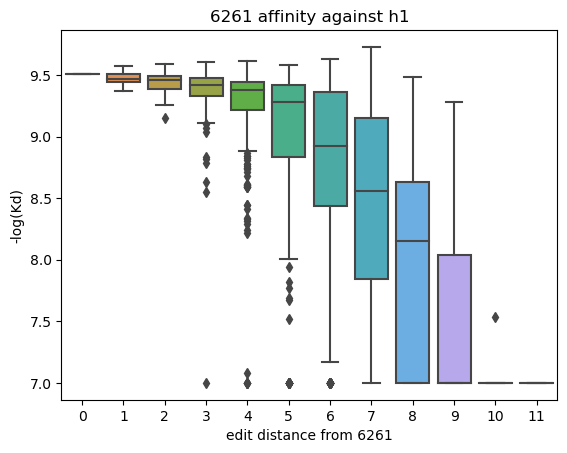

In [22]:
plot_affinity_by_edit_distance(ab, df, target=ag)